In [32]:
# shotnumber2wave.py
# !python /path/to/my_script.py
# python shotnumber2wave.py <shot_number> <output_dir>
import os
script_path = 'shotnumber2wave.py'
#!python shotnumber2wave.py  54990200300228331 ../result
os.system(f'python {script_path} 54990200300228331 ../result')

## read l1b and l2a files list...
## beam number:  BEAM0010
## find l1b file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2019/336/GEDI01_B_2019336024706_O05499_03_T03754_02_005_01_V002.h5
## find l2a file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2019/336/GEDI02_A_2019336024706_O05499_03_T03754_02_003_01_V002_10algs.h5
## plotting...
## save plot in jpg...


0

In [33]:
os.system(f'python {script_path} 155131100200064320 ../result')

## read l1b and l2a files list...
## beam number:  BEAM1011
## find l1b file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2021/251/GEDI01_B_2021251024134_O15513_02_T04789_02_005_02_V002.h5
## find l2a file:  /gpfs/data1/vclgp/data/iss_gedi/soc/2021/251/GEDI02_A_2021251024134_O15513_02_T04789_02_003_02_V002_10algs.h5
## plotting...
## save plot in jpg...


0

In [42]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas
import geopandas as gpd
from shapely.geometry import Point
# high
# Define center coordinates (latitude and longitude)
center_lat = 25.4227  # Example latitude
center_lon = -81.1337  # Example longitude

#center_lat = 25.1676
#center_lon = -80.9091
# low similar 
center_lat = 25.1649753
center_lon = -80.9105185

# Convert center coordinates to a Point object
center_point = Point(center_lon, center_lat)

#
d = 12.5/110000
# Create a circle with a radius of 12.5 meters around the center point
circle = center_point.buffer(d)

# Create a GeoDataFrame with the circle geometry
gdf = gpd.GeoDataFrame(geometry=[circle])

# Save GeoDataFrame to a GeoPackage file
gdf.to_file("../result/low_circle_similar.gpkg", driver="GPKG")

In [233]:
# read csv 
import pandas as pd

In [232]:
import matplotlib.pyplot as plt

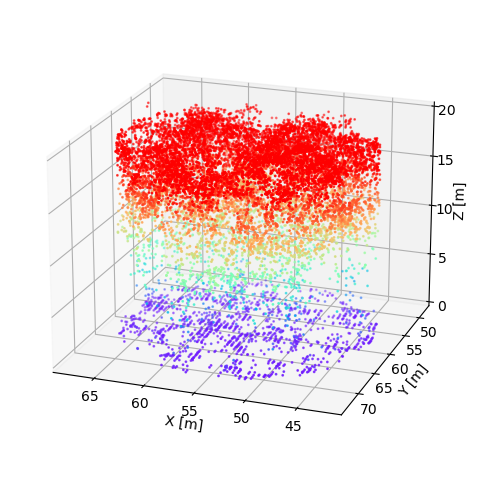

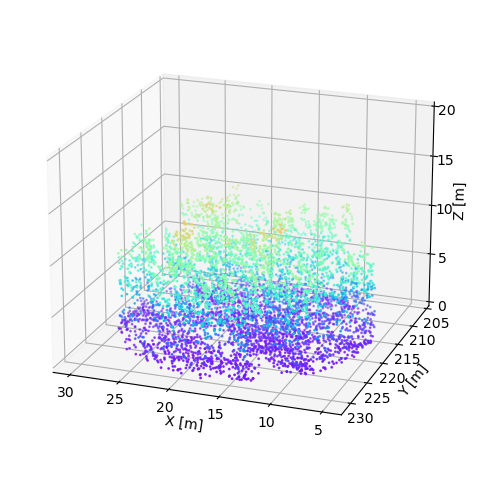

In [261]:
import matplotlib.ticker as ticker
df = pd.read_csv('../data/high.csv')
def plot_df(df,name):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(projection='3d')
    img = ax.scatter(df['X'], df['Y'], df['Z'], c=df['Z'], cmap='rainbow', s=1, vmin=0, vmax=17)
    #plt.colorbar(img,fraction=0.03, pad=-0.02,location='top')
    ax.set_xlabel('X [m]', labelpad=-5)
    ax.set_ylabel('Y [m]', labelpad=-5)
    ax.tick_params(pad=-2)  # Increase or decrease pad as needed
    ax.set_zlabel('Z [m]', labelpad=-7)
    ax.zaxis.set_major_locator(ticker.MultipleLocator(5)) 
    ax.set_zlim(0,20)
    ax.view_init(20, 110, 0)
    # [left, bottom, right, top]
    plt.savefig('../result/' + name + '.jpg', dpi=600,bbox_inches = 'tight')
    plt.show()
plot_df(pd.read_csv('../data/high.csv'), 'high')
plot_df(pd.read_csv('../data/low.csv'), 'low')